In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
from scipy import special

In [2]:
data = pd.read_csv('../data/raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
def data_overview(df):
    print("Rows :  " , df.shape[0])
    print("Columns:  " , df.shape[1] )
    print()
    print("Feature types:  ")
    print(df.dtypes)
    print()
    print('Missing values : ')
    print(df.isnull().sum()) 
    print()
    print('Unique values:')
    print(df.nunique())
data_overview(data)

Rows :   7043
Columns:   21

Feature types:  
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values : 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Con

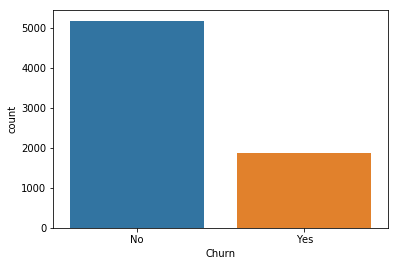

In [4]:
# Churn: Whether the customer churned or not (Yes or No)
# churn_yes means customers who decide to stop using a service offered by this company
sns.countplot(x='Churn', data=data)
# the target y: biased

In [5]:
# ratio of NotChurn:Churn
ratio = data[data.Churn=='No'].shape[0]/data[data.Churn=='Yes'].shape[0]
ratio
# usually, ratio>3 or 4 is imbalanced dataset
# so not very biased in this case
# since the dataset has 7043 samples
# Over-sampling "Yes" is a good idea
# Another idea is to set class_weight for models

2.7683253076511503

In [6]:
# customerID: Customer ID
data.customerID.nunique() # = rows
# useless feature, to delete

7043

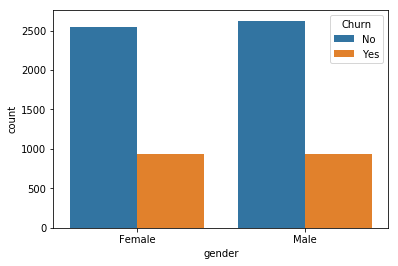

In [7]:
# gender:Whether the customer is a male or a female
sns.countplot(x='gender',data=data,hue='Churn')
# seems no relation with churn

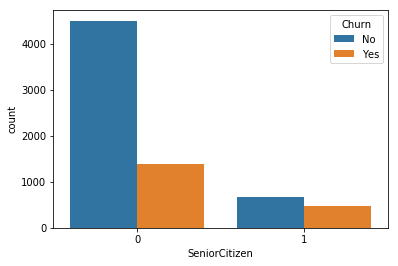

In [8]:
# SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
sns.countplot(x='SeniorCitizen',data=data,hue='Churn')
# Senior citizen has a higher churn rate

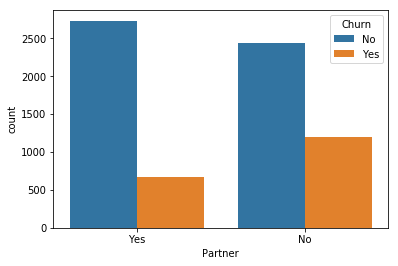

In [9]:
# Partner: Whether the customer has a partner or not (Yes, No)
sns.countplot(x='Partner',data=data,hue='Churn')
# Partner has a lower churn rate 

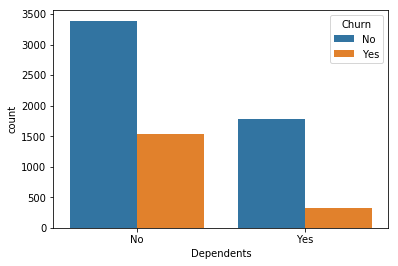

In [10]:
# Dependents: Whether the customer has dependents or not (Yes, No)
sns.countplot(x='Dependents',data=data,hue='Churn')
# Dependents has a lower churn rate

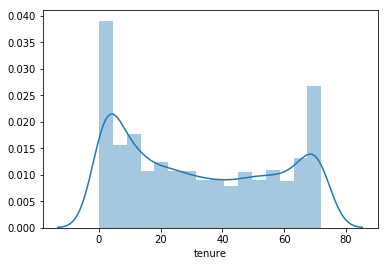

In [11]:
# tenure: Number of months the customer has stayed with the company
x=data.tenure
sns.distplot(x)
# strange distribution, a lot of extreme values

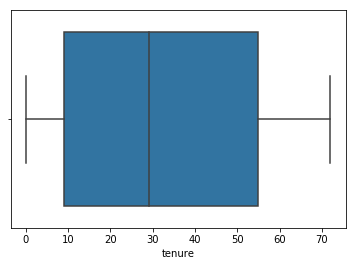

In [12]:
sns.boxplot(x='tenure',data=data) # but there is no outliers

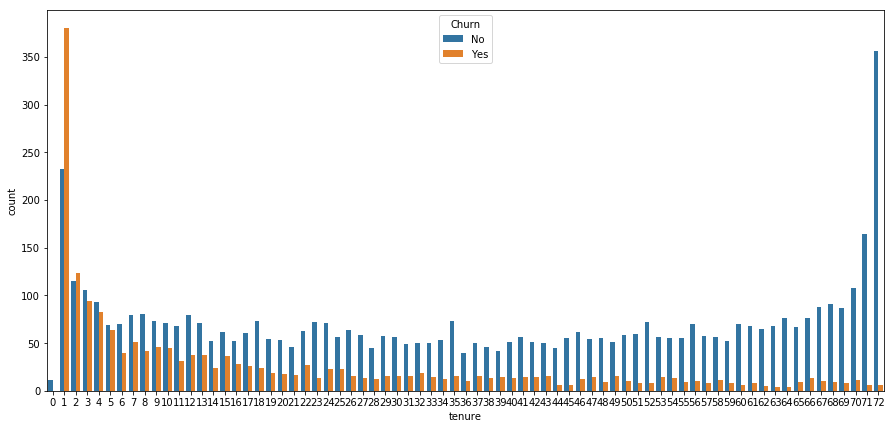

In [13]:
plt.figure(figsize=(15, 7))
sns.countplot(x='tenure',data=data,hue='Churn')
plt.show()
# clearly, for those churn people, longer tenure, lower churn rate

In [14]:
# try to categorize tenure
bins = [0, 12, 24, 36, 48, 60, 72]
data['tenure_group'] = pd.cut(data['tenure'], bins)
data['tenure_group'].value_counts()

(0, 12]     2175
(60, 72]    1407
(12, 24]    1024
(48, 60]     832
(24, 36]     832
(36, 48]     762
Name: tenure_group, dtype: int64

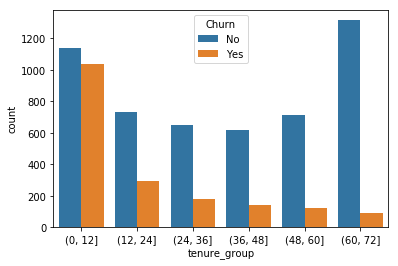

In [15]:
sns.countplot(x='tenure_group',data=data,hue='Churn')

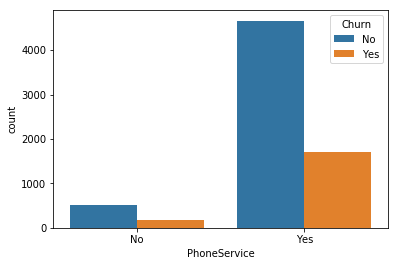

In [16]:
# PhoneService: Whether the customer has a phone service or not (Yes, No)
sns.countplot(x='PhoneService',data=data,hue='Churn')
# not very evident relation with chrun

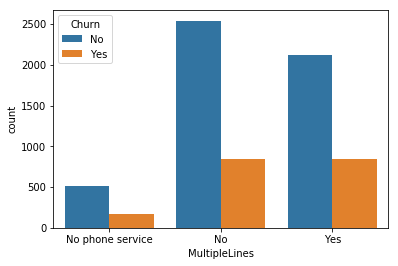

In [17]:
# MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
sns.countplot(x='MultipleLines',data=data,hue='Churn')
# not very evident relation with chrun

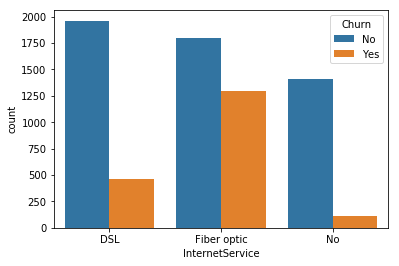

In [18]:
# InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
sns.countplot(x='InternetService',data=data,hue='Churn')
# obvious relation with churn rate, if ignoring No_internet_service

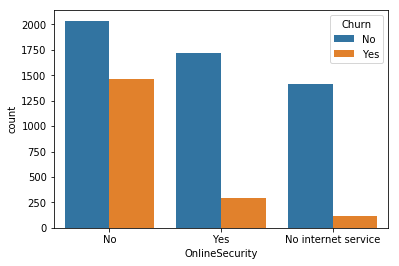

In [19]:
# OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
sns.countplot(x='OnlineSecurity',data=data,hue='Churn')
# obvious relation with churn rate, if ignoring No_internet_service

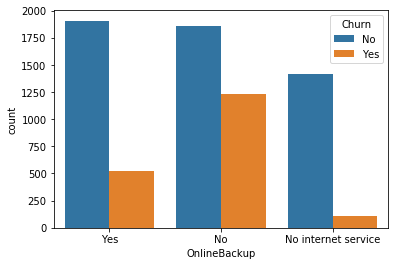

In [20]:
# OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
sns.countplot(x='OnlineBackup',data=data,hue='Churn')
# obvious relation with churn rate, if ignoring No_internet_service

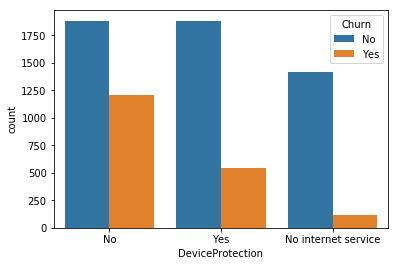

In [21]:
# DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
sns.countplot(x='DeviceProtection',data=data,hue='Churn')
# obvious relation with churn rate, if ignoring No_internet_service

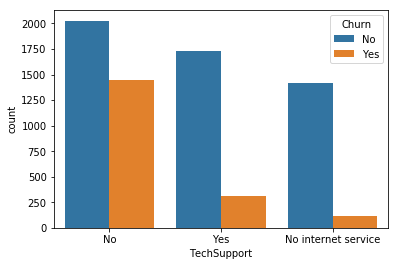

In [22]:
# TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
sns.countplot(x='TechSupport',data=data,hue='Churn')
# obvious relation with churn rate, if ignoring No_internet_service

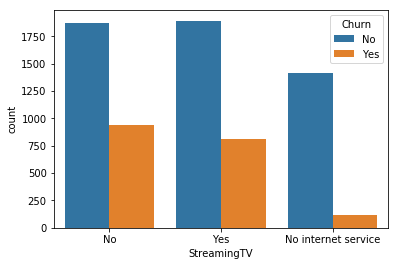

In [23]:
# StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
sns.countplot(x='StreamingTV',data=data,hue='Churn')
# no obvious relation with churn rate, if ignoring No_internet_service

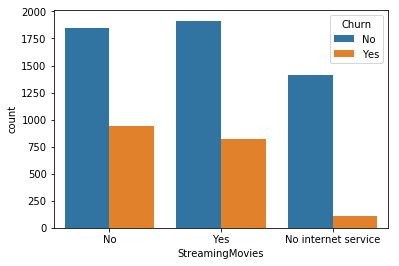

In [24]:
# StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
sns.countplot(x='StreamingMovies',data=data,hue='Churn')
# no obvious relation with churn rate, if ignoring No_internet_service

In [25]:
# No_internet_service users in these features:
# StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineBackup,OnlineSecurity,InternetService
# all have a very low churn rate!
# Are they the same people?
print(data[data.InternetService == "No"].shape)
print(data[(data.StreamingTV == "No internet service") &
           (data.TechSupport == "No internet service") &
           (data.DeviceProtection == "No internet service") &
           (data.OnlineSecurity == "No internet service") &
           (data.StreamingMovies == "No internet service") &
           (data.OnlineBackup == "No internet service") &
           (data.InternetService == "No")].shape)
# Conclusion: those who do not have InternetService,
#     do not have StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineSecurity,OnlineBackup either!
# They are the same people

# Idea: drop "No internet service" of 
#       StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineSecurity,OnlineBackup
#       when do one-hot encoding!

(1526, 22)
(1526, 22)


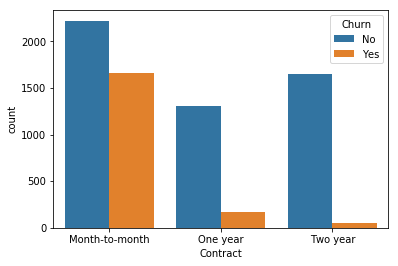

In [26]:
# Contract: The contract term of the customer (Month-to-month, One year, Two year)
sns.countplot(x='Contract',data=data,hue='Churn')
# Clearly, month contract has a really higher chrun rate compared to year contract

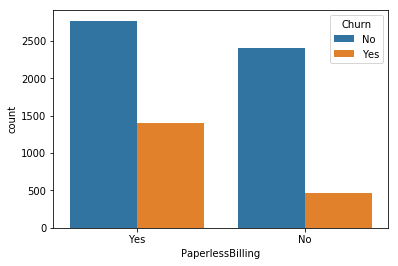

In [27]:
# PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
sns.countplot(x='PaperlessBilling',data=data,hue='Churn')
# make small sense

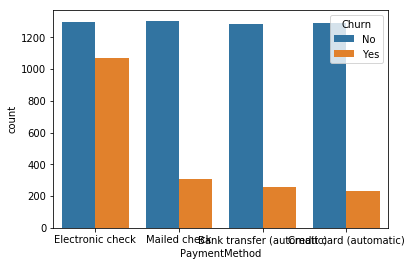

In [28]:
# PaymentMethod: The customer’s payment method 
sns.countplot(x='PaymentMethod',data=data,hue='Churn')
# Eletronic checker payer has the highest churn rate!

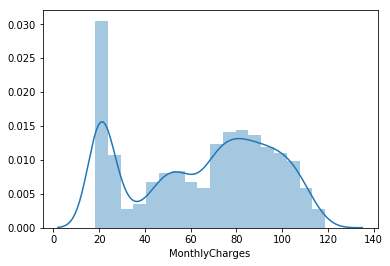

In [29]:
# MonthlyCharges: The amount charged to the customer monthly
x=data.MonthlyCharges
sns.distplot(x)
# extreme values at left

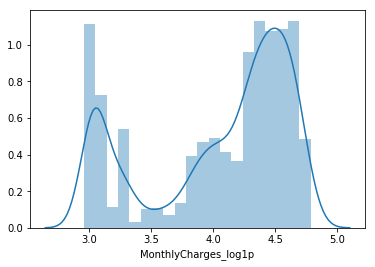

In [36]:
data['MonthlyCharges_log1p'] = np.log1p(data['MonthlyCharges'])
x=data.MonthlyCharges_log1p
sns.distplot(x)

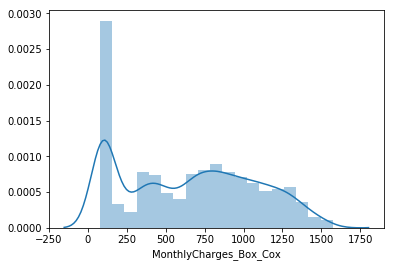

In [37]:
data['MonthlyCharges_Box_Cox'] = special.boxcox1p(
    data['MonthlyCharges'], stats.boxcox_normmax(data['MonthlyCharges'] + 1))
x = data.MonthlyCharges_Box_Cox
sns.distplot(x)

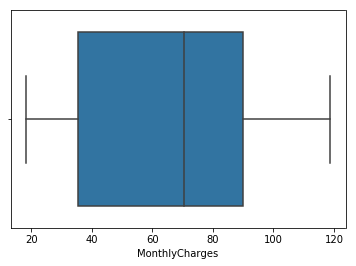

In [30]:
sns.boxplot(x='MonthlyCharges',data=data) # but there is no outliers

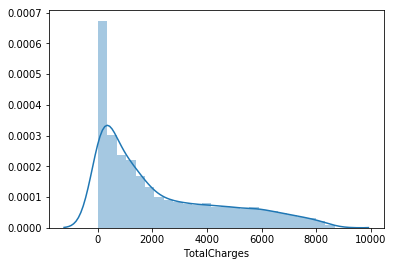

In [31]:
# TotalCharges: The total amount charged to the customer
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce').fillna(0)  # object->numeric
x=data.TotalCharges
sns.distplot(x)
# extreme values at left, highly positve skewed

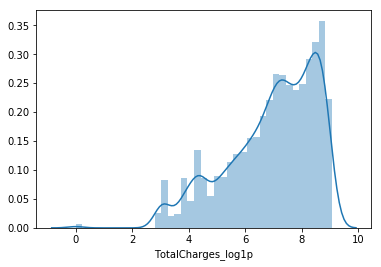

In [32]:
data['TotalCharges_log1p'] = np.log1p(data['TotalCharges'])
x=data.TotalCharges_log1p
sns.distplot(x)

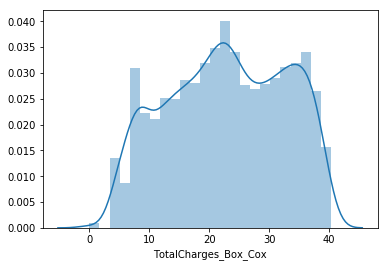

In [35]:
data['TotalCharges_Box_Cox'] = special.boxcox1p(data['TotalCharges'], stats.boxcox_normmax(data['TotalCharges'] + 1))
x=data.TotalCharges_Box_Cox
sns.distplot(x)

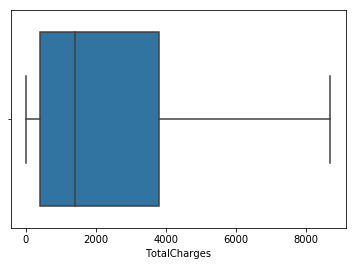

In [39]:
sns.boxplot(x='TotalCharges',data=data) # no outliers

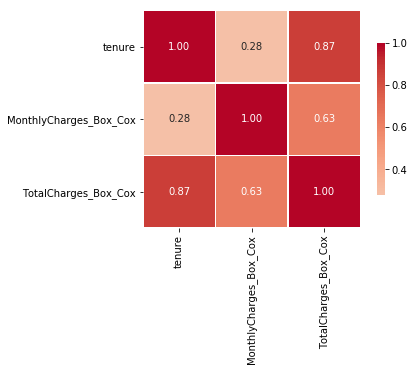

In [44]:
sns.heatmap(data[['tenure','MonthlyCharges_Box_Cox','TotalCharges_Box_Cox']].corr(method='pearson'), vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='coolwarm')

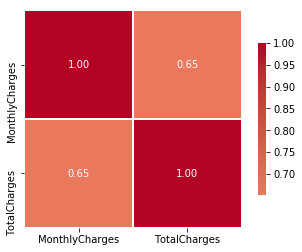

In [43]:
sns.heatmap(data[['MonthlyCharges','TotalCharges']].corr(method='pearson'), vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='coolwarm')

In [ ]:
# idea: drop TotalCharges